# Import the libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_style("darkgrid")

# Import the data

In [3]:
train=pd.read_excel("Data_Train.xlsx")
test=pd.read_excel("Test_set.xlsx")


In [4]:
train.columns=train.columns.str.lower()
test.columns=test.columns.str.lower()

# EDA

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          10683 non-null  object
 1   date_of_journey  10683 non-null  object
 2   source           10683 non-null  object
 3   destination      10683 non-null  object
 4   route            10682 non-null  object
 5   dep_time         10683 non-null  object
 6   arrival_time     10683 non-null  object
 7   duration         10683 non-null  object
 8   total_stops      10682 non-null  object
 9   additional_info  10683 non-null  object
 10  price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train.isna().sum()

airline            0
date_of_journey    0
source             0
destination        0
route              1
dep_time           0
arrival_time       0
duration           0
total_stops        1
additional_info    0
price              0
dtype: int64

In [7]:
train.dropna(inplace=True)

There is one value missing in route and total_stops. we are dropping that

In [8]:
train.duplicated().sum()

220

In [9]:
# there are 220 duplicates values in data.
# we are removing that 
train.drop_duplicates(keep='first',inplace=True)
train.reset_index(drop=True,inplace=True)

In [10]:
train.shape,test.shape

((10462, 11), (2671, 10))

In [11]:
data=pd.concat([train,test],axis=0)
data.reset_index(drop=True,inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13133 entries, 0 to 13132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          13133 non-null  object 
 1   date_of_journey  13133 non-null  object 
 2   source           13133 non-null  object 
 3   destination      13133 non-null  object 
 4   route            13133 non-null  object 
 5   dep_time         13133 non-null  object 
 6   arrival_time     13133 non-null  object 
 7   duration         13133 non-null  object 
 8   total_stops      13133 non-null  object 
 9   additional_info  13133 non-null  object 
 10  price            10462 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [13]:
data['date_of_journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [14]:
train['date_of_journey']=pd.to_datetime(train.date_of_journey,format='%d/%m/%Y')

<AxesSubplot:xlabel='airline', ylabel='count'>

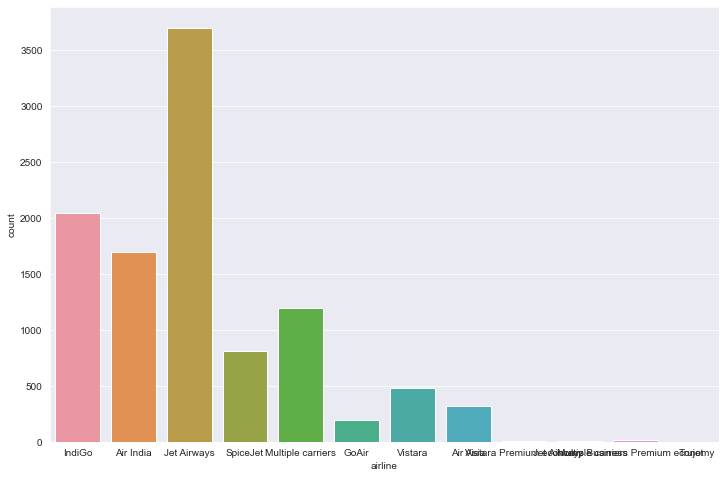

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(train['airline'])

In [16]:
data.airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [17]:
data.source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [18]:
data.destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [19]:
data.route=data.route.apply(lambda x:str(x).replace('→','_'))
data.route=data.route.apply(lambda x:str(x).replace(' ',''))
data.replace('nan',np.nan,inplace=True)

In [20]:
data.additional_info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [21]:
data.replace('No Info','No info',inplace=True)

In [22]:
data['total_stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [23]:
data['total_stops']=data['total_stops'].apply(lambda x:x.split(' ')[0])
data['total_stops'].replace('non-stop',0,inplace=True)
data['total_stops']=data['total_stops'].astype('int')

In [24]:
def my_fun(x):
    if (('h' in x) & ('m' in x)):
        return (int(x.split('h')[0])*60+int(x.replace('m','').split(' ')[1]))
    elif ('h' in x):
        return (int(x[:-1])*60)
    else:
        return int(x[:-1])
        

In [25]:
data['duration']=data['duration'].apply(my_fun)

In [26]:
data['day_of_journy']=pd.DatetimeIndex(data['date_of_journey']).day
data['month_of_journy']=pd.DatetimeIndex(data['date_of_journey']).month
data['year_of_journy']=pd.DatetimeIndex(data['date_of_journey']).year

In [27]:
data['day_of_journy']=data['day_of_journy'].astype("str")
data['month_of_journy']=data['month_of_journy'].astype("str")
data['year_of_journy']=data['year_of_journy'].astype("str")

In [28]:
data['dep_time']=data.dep_time.apply(lambda x:( (int(x.split(':')[0])*60) + (int(x.split(':')[1]))))

In [29]:
data.drop(['date_of_journey','arrival_time'],axis=1,inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13133 entries, 0 to 13132
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          13133 non-null  object 
 1   source           13133 non-null  object 
 2   destination      13133 non-null  object 
 3   route            13133 non-null  object 
 4   dep_time         13133 non-null  int64  
 5   duration         13133 non-null  int64  
 6   total_stops      13133 non-null  int32  
 7   additional_info  13133 non-null  object 
 8   price            10462 non-null  float64
 9   day_of_journy    13133 non-null  object 
 10  month_of_journy  13133 non-null  object 
 11  year_of_journy   13133 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 1.2+ MB


In [31]:
data

,airline,source,destination,route,dep_time,duration,total_stops,additional_info,price,day_of_journy,month_of_journy,year_of_journy
0,IndiGo,Banglore,New Delhi,BLR_DEL,1340,170,0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU_IXR_BBI_BLR,350,445,2,No info,7662.0,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL_LKO_BOM_COK,565,1140,2,No info,13882.0,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU_NAG_BLR,1085,325,1,No info,6218.0,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR_NAG_DEL,1010,285,1,No info,13302.0,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
13128,Air India,Kolkata,Banglore,CCU_DEL_BLR,1230,1435,1,No info,NaN,6,6,2019
13129,IndiGo,Kolkata,Banglore,CCU_BLR,860,155,0,No info,NaN,27,3,2019
13130,Jet Airways,Delhi,Cochin,DEL_BOM_COK,1310,395,1,No info,NaN,3,6,2019
13131,Air India,Delhi,Cochin,DEL_BOM_COK,240,915,1,No info,NaN,3,6,2019


In [32]:
data['route'].unique()

array(['BLR_DEL', 'CCU_IXR_BBI_BLR', 'DEL_LKO_BOM_COK', 'CCU_NAG_BLR',
       'BLR_NAG_DEL', 'CCU_BLR', 'BLR_BOM_DEL', 'DEL_BOM_COK',
       'DEL_BLR_COK', 'MAA_CCU', 'CCU_BOM_BLR', 'DEL_AMD_BOM_COK',
       'DEL_PNQ_COK', 'DEL_CCU_BOM_COK', 'BLR_COK_DEL', 'DEL_IDR_BOM_COK',
       'DEL_LKO_COK', 'CCU_GAU_DEL_BLR', 'DEL_NAG_BOM_COK', 'CCU_MAA_BLR',
       'DEL_HYD_COK', 'CCU_HYD_BLR', 'DEL_COK', 'CCU_DEL_BLR',
       'BLR_BOM_AMD_DEL', 'BOM_DEL_HYD', 'DEL_MAA_COK', 'BOM_HYD',
       'DEL_BHO_BOM_COK', 'DEL_JAI_BOM_COK', 'DEL_ATQ_BOM_COK',
       'DEL_JDH_BOM_COK', 'CCU_BBI_BOM_BLR', 'BLR_MAA_DEL',
       'DEL_GOI_BOM_COK', 'DEL_BDQ_BOM_COK', 'CCU_JAI_BOM_BLR',
       'CCU_BBI_BLR', 'BLR_HYD_DEL', 'DEL_TRV_COK', 'CCU_IXR_DEL_BLR',
       'DEL_IXU_BOM_COK', 'CCU_IXB_BLR', 'BLR_BOM_JDH_DEL',
       'DEL_UDR_BOM_COK', 'DEL_HYD_MAA_COK', 'CCU_BOM_COK_BLR',
       'BLR_CCU_DEL', 'CCU_BOM_GOI_BLR', 'DEL_RPR_NAG_BOM_COK',
       'DEL_HYD_BOM_COK', 'CCU_DEL_AMD_BLR', 'CCU_PNQ_BLR',
       'BLR_

In [33]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

In [34]:
encoder=ce.CountEncoder(cols=['route'])

In [35]:
X=data.drop('price',axis=1)
y=data['price']

In [36]:
encoder.fit(X,y)

CountEncoder(cols=['route'], combine_min_nan_groups=True)

In [37]:
X=encoder.transform(X,y)

In [38]:
X=pd.get_dummies(X,columns=['airline','source','destination','additional_info'],drop_first=True)

In [39]:
sc=StandardScaler()
sc.fit(X)

StandardScaler()

In [40]:
X

,route,dep_time,duration,total_stops,day_of_journy,month_of_journy,year_of_journy,airline_Air India,airline_GoAir,airline_IndiGo,...,destination_Kolkata,destination_New Delhi,additional_info_1 Short layover,additional_info_2 Long layover,additional_info_Business class,additional_info_Change airports,additional_info_In-flight meal not included,additional_info_No check-in baggage included,additional_info_No info,additional_info_Red-eye flight
0,1925,1340,170,0,24,3,2019,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,7,350,445,2,5,1,2019,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,46,565,1140,2,6,9,2019,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,11,1085,325,1,5,12,2019,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,4,1010,285,1,3,1,2019,0,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13128,689,1230,1435,1,6,6,2019,1,0,0,...,0,0,0,0,0,0,0,0,1,0
13129,896,860,155,0,27,3,2019,0,0,1,...,0,0,0,0,0,0,0,0,1,0
13130,3000,1310,395,1,3,6,2019,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13131,3000,240,915,1,3,6,2019,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13133 entries, 0 to 13132
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   route                                         13133 non-null  int64 
 1   dep_time                                      13133 non-null  int64 
 2   duration                                      13133 non-null  int64 
 3   total_stops                                   13133 non-null  int32 
 4   day_of_journy                                 13133 non-null  object
 5   month_of_journy                               13133 non-null  object
 6   year_of_journy                                13133 non-null  object
 7   airline_Air India                             13133 non-null  uint8 
 8   airline_GoAir                                 13133 non-null  uint8 
 9   airline_IndiGo                                13133 non-null  uint8 
 10

<AxesSubplot:xlabel='route', ylabel='Density'>

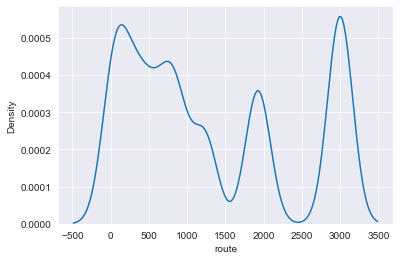

In [42]:
sns.kdeplot(X['route'])

<AxesSubplot:>

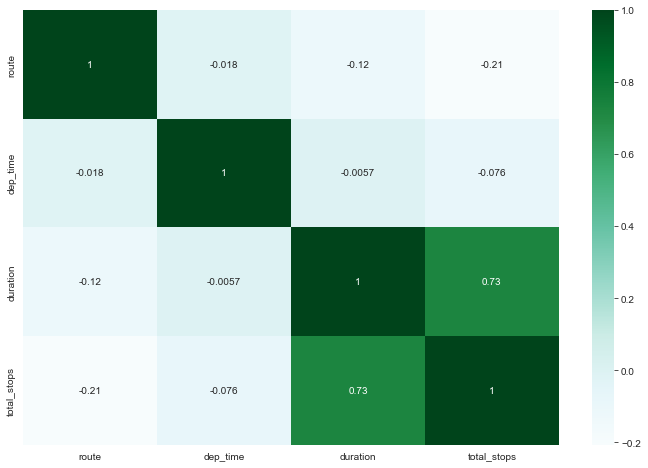

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(X.iloc[:,0:7].corr(),annot=True,cmap='BuGn')

In [44]:
X=pd.DataFrame(sc.transform(X),columns=X.columns)

In [45]:
train=X.iloc[0:10462,:]
test=X.iloc[10462:,:]

In [46]:
train['price']=y.iloc[0:10462]

# Model Building

In [47]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,VotingRegressor,RandomForestRegressor

In [48]:
X=train.drop('price',axis=1)
y=train['price']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [50]:
model=RandomForestRegressor()

In [51]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [52]:
model.score(X_train,y_train)

0.9820191158160009

In [53]:
y_pred=model.predict(X_test)

In [54]:
from sklearn.metrics import r2_score,mean_absolute_error

In [55]:
r2_score(y_test,y_pred)

0.8816593930367467

In [56]:
df=pd.DataFrame({'test':y_test,'pred':y_pred})

<AxesSubplot:xlabel='price', ylabel='Density'>

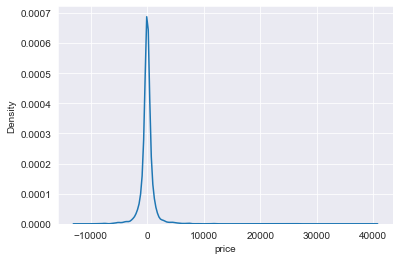

In [57]:
sns.kdeplot((y_test-y_pred))

#    # cross validation and hyper parameter tuning

In [61]:
# Number of trees in random forest
n_estimators = [200,400]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,21,32,43]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [62]:
gs=GridSearchCV(model,param_grid=random_grid,cv=10,n_jobs=10)

In [ ]:
gs.fit(X_train,y_train)